# Microcenter
## Imports

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Grab CSV files

In [3]:
stores_df_2019 = pd.read_csv('../data/combined_2019_stores_flat.csv')
stores_df_2020 = pd.read_csv('../data/combined_2020.csv')

stores_df_2019.tail(3)

,METRO,migration_net,population,male_20_34_p,enrolled_9_12_p,enrolled_college_p,enrolled_grad_p,occ_com_sci_math_p,occ_eng_p,mult_desktop_laptop_p,inc_50_74,inc_75_99,inc_100_149,inc_150_199,median_income,mean_income,stores
381,"Youngstown-Warren-Boardman, OH-PA Metro Area",-1973,541846,8.99,5.12,4.13,0.71,0.58,0.96,30.08,18.3,11.9,11.8,3.0,47360,64175,0
382,"Yuba City, CA Metro Area",837,172469,11.21,5.75,6.00,0.88,0.37,0.74,25.38,18.1,12.2,16.2,6.1,58551,76413,0
383,"Yuma, AZ Metro Area",786,209468,12.74,6.03,5.16,0.57,0.25,0.67,23.55,18.6,12.0,10.1,3.0,45243,59526,0


## Preparing Dataframes
First I want to create arrays with the metro names and the targets (whether or not the metro has a location already)

In [4]:
micro_metros = stores_df_2019['METRO'].values
micro_targets_2019 = stores_df_2019['stores'].values
print(micro_targets_2019)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Preparing the dataframe with training values by removing the first and last columns

In [5]:
micro_training_values_2019 = stores_df_2019.iloc[:, 1:]

micro_training_values_2019 = micro_training_values_2019.iloc[:, :-1]

micro_training_values_2019.tail(3)

,migration_net,population,male_20_34_p,enrolled_9_12_p,enrolled_college_p,enrolled_grad_p,occ_com_sci_math_p,occ_eng_p,mult_desktop_laptop_p,inc_50_74,inc_75_99,inc_100_149,inc_150_199,median_income,mean_income
381,-1973,541846,8.99,5.12,4.13,0.71,0.58,0.96,30.08,18.3,11.9,11.8,3.0,47360,64175
382,837,172469,11.21,5.75,6.00,0.88,0.37,0.74,25.38,18.1,12.2,16.2,6.1,58551,76413
383,786,209468,12.74,6.03,5.16,0.57,0.25,0.67,23.55,18.6,12.0,10.1,3.0,45243,59526


## Prepare for Dimension Reduction using PCA

### Standardize and scale all the values

PCA is effected by the scale of the values, so to begin I will use StandardScaler to standardize each value. This creates a new set of values which are normally distributed and has a mean of 0 and standard deviation of 1.

In [6]:
X = StandardScaler().fit_transform(micro_training_values_2019)

### Calculate the Kaiser-Meyer-Olkin criterion sampling adequacy.

This statistic represents the degree to which each observed variable is predicted, without error, by the other variables in the dataset. It meastures the adequacy for each variable as well as the entire dataset. In general, a KMO < 0.6 is considered inadequate.

The model KMO was calculated as 0.81 which the data is suitable for Factor Analysis.

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars, kmo_model = calculate_kmo(X)
print(f'KMO of each variable: {kmo_vars}')
print(f'KMO of entire dataset: {kmo_model}')

KMO of each variable: [0.85246624 0.84155474 0.71454736 0.55774896 0.73646084 0.78117795
 0.8581839  0.90662081 0.68132139 0.78588415 0.65855889 0.85220726
 0.88463483 0.77966191 0.82721856]
KMO of entire dataset: 0.8068663936606472


/Users/michael/opt/anaconda3/envs/py310/lib/python3.10/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


This is just a dataframe showing the scaled values for each feature.

In [8]:
feature_cols = ['Feature '+str(i + 1) for i in range(X.shape[1])]
normal_values = pd.DataFrame(X, columns=feature_cols)
normal_values.head(3)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15
0,0.043466,-0.342856,1.195783,-0.073368,0.144512,-0.268587,-0.805029,-0.794606,-1.050272,0.210229,-0.329191,-0.431073,-0.577702,-0.560423,-0.562554
1,-0.411680,-0.014465,-0.269750,-0.159966,-0.002903,0.391274,0.148203,0.339701,0.702717,-0.235781,0.187972,-0.160153,0.062167,-0.133518,-0.027556
2,-0.305647,-0.370954,-0.489579,-0.145533,-0.761476,-0.330838,-0.622495,-0.442971,0.232332,1.357111,0.779016,-0.160153,-0.774585,-0.257994,-0.574134


## Dimension Reduction using Principal Component Analysis

First I perform the PCA with the maximum number of Principal Components to view the total and cumulative variance of each one.

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
pca_features = pca.fit_transform(X)

pc_list = ['PC'+str(i) for i in list(range(1, len(pca_features[0]) + 1))]

pca_df = pd.DataFrame(data=pca_features, columns=pc_list)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.576156,0.691321,0.531358,-0.939486,0.357969,0.184570,-0.738672,0.687587,-0.058270,-0.067036,-0.036392,-0.053907,-0.081602,0.073182,0.032096
1,0.247076,0.269608,-0.467653,0.482213,-0.327279,0.028161,0.458154,-0.284695,-0.149651,-0.281445,-0.110313,-0.072762,0.260663,-0.133432,0.051977
2,-1.511260,-0.817452,-1.325261,-0.008651,0.526745,-0.150122,0.257583,0.050595,0.062210,0.125206,-0.150131,-0.333794,0.078174,0.181144,-0.139543
3,3.075815,-0.242208,-0.694854,0.168696,-0.682405,0.076838,-0.046413,-0.248565,-0.321569,-0.174266,-0.062307,-0.054616,-0.451435,-0.048077,-0.082732
4,-2.929298,0.620301,2.405916,0.012200,-0.599915,-0.408244,0.112033,-0.874885,0.499729,-0.260054,0.526206,0.134663,-0.294931,0.005765,-0.161556


In [10]:
evra = pca.explained_variance_ratio_
print(f'Explained variance for each Principal Component:', evra)
print(f'Total explained variance: {round(100 * np.sum(evra), 2)}%')

Explained variance for each Principal Component: [0.40673389 0.17806315 0.12303406 0.08930106 0.06311503 0.03928666
 0.02761505 0.01792439 0.01288576 0.01272692 0.01050957 0.00929052
 0.00612432 0.00252688 0.00086275]
Total explained variance: 100.0%


Cumulative Variance Explained [0.40673389 0.58479703 0.70783109 0.79713215 0.86024718 0.89953384
 0.92714889 0.94507328 0.95795903 0.97068596 0.98119553 0.99048605
 0.99661037 0.99913725 1.        ]


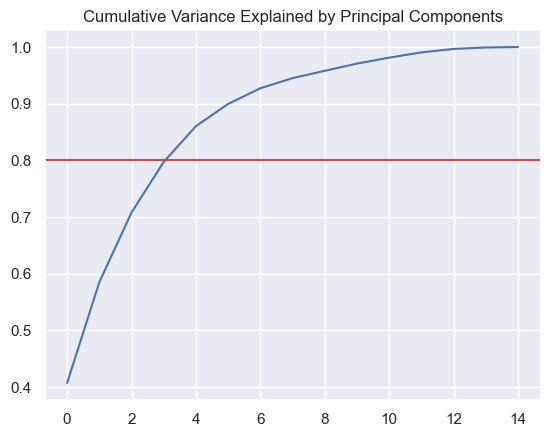

In [11]:
print('Cumulative Variance Explained', np.cumsum(pca.explained_variance_ratio_))

sns.set()

plt.plot(
    np.cumsum(pca.explained_variance_ratio_)
)
plt.axhline(y=0.8, color='r', linestyle='-')

plt.title('Cumulative Variance Explained by Principal Components')

plt.show()

In [12]:
# Copying to clipboard to create graph
cum_sum_vr = pd.DataFrame(data=np.cumsum(pca.explained_variance_ratio_))
cum_sum_vr.to_clipboard()

[6.1169378  2.67792095 1.85032944 1.34301326 0.94919732 0.5908386
 0.41530729 0.26956779 0.19379104 0.19140231 0.15805516 0.13972162
 0.09210468 0.03800216 0.01297506]


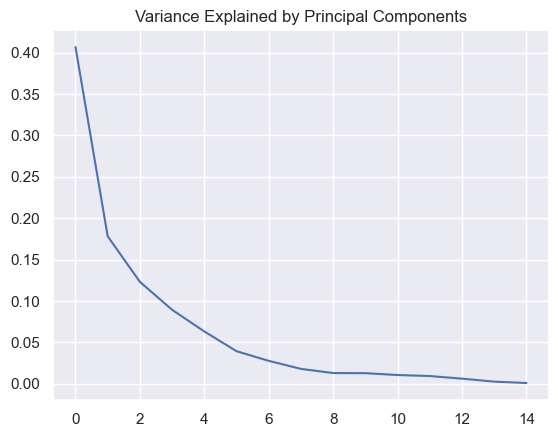

In [13]:
print(pca.explained_variance_)

sns.set()

plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Principal Components')

plt.show()

In [14]:
# Copying to clipboard to create graph
var_explained_pc = pd.DataFrame(data=pca.explained_variance_)
var_explained_pc.to_clipboard()

## Dimension Reduction

There are a few methods of determining how many components to build the model with, but here I am reducing down to 2 Principal Components.

In [29]:
pcax = PCA(n_components=2)
pcax_features = pcax.fit_transform(X)

pcx_list = ['PC'+str(i) for i in list(range(1, len(pcax_features[0]) + 1))]

pcax_df = pd.DataFrame(data=pcax_features, columns=pcx_list)
pcax_df.head()

,PC1,PC2
0,-1.576156,0.691321
1,0.247076,0.269608
2,-1.511260,-0.817452
3,3.075815,-0.242208
4,-2.929298,0.620301


In [16]:
evr = pcax.explained_variance_ratio_
print(f'Explained variance for each Principal Component', evr)
print(f'Total explained variance: {round(100 * np.sum(evr), 2)}%')

Explained variance for each Principal Component [0.40673389 0.17806315]
Total explained variance: 58.48%


Dataframe showing the effect of the Principal Components on each metro.

In [17]:
pcax_df.insert(0, 'metro', micro_metros)
pcax_df.head(5)

,metro,PC1,PC2
0,"Abilene, TX Metro Area",-1.576156,0.691321
1,"Akron, OH Metro Area",0.247076,0.269608
2,"Albany-Lebanon, OR Metro Area",-1.511260,-0.817452
3,"Albany-Schenectady-Troy, NY Metro Area",3.075815,-0.242208
4,"Albany, GA Metro Area",-2.929298,0.620301


In [ ]:
# For scatter plot
pcax_targets_df = pcax_df[['PC1', 'PC2']]
pcax_targets_df.insert(2, 'targets', micro_targets_2019)

pcax_targets_df.to_csv(index=False)
# pcax_targets_df.to_clipboard()

Finding the loadings, or the effects each Principal Component has on each feature.

In [19]:
# Principal components correlation coefficients
loadings = pcax.components_
# Principal Components before reductions
number_pcs = pcax.n_features_
# Feature names before PCA
feature_names = micro_training_values_2019.columns.values

# Zip pcx_list with loadings
pcx_loadings = dict(zip(pcx_list, loadings))

pcx_loadings_df = pd.DataFrame.from_dict(pcx_loadings)

pcx_loadings_df['features'] = feature_names

pcx_loadings_df = pcx_loadings_df.set_index('features')

pcx_loadings_df.to_clipboard()

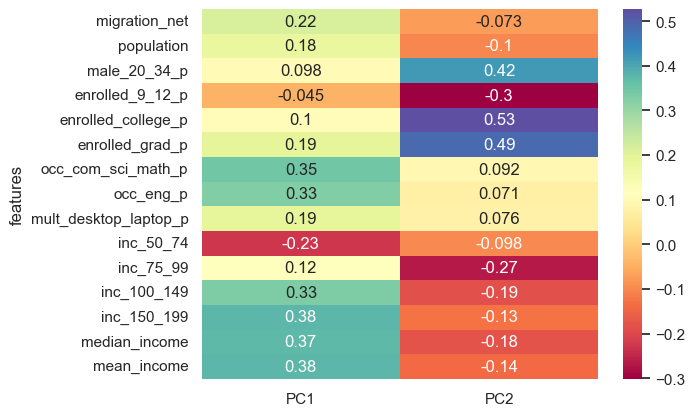

In [20]:
# Heatmap
pcx_heatmap = sns.heatmap(pcx_loadings_df, annot=True, cmap='Spectral')
plt.show()

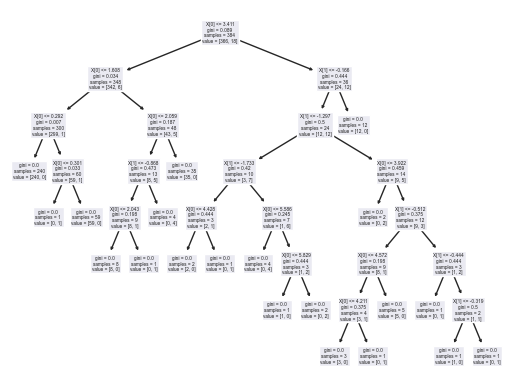

In [21]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()

classifier.fit(pcax_features, micro_targets_2019)

tree.plot_tree(classifier)
plt.show()

In [22]:
micro_test_values_2020 = stores_df_2020.iloc[:, 1:-1]

micro_test_values_2020_transformed = pcax.fit_transform(micro_test_values_2020)

predictions_2020 = classifier.predict(micro_test_values_2020_transformed)

print(predictions_2020, len(predictions_2020), np.count_nonzero(predictions_2020))

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 384 39


In [23]:
predictions_2020_df = stores_df_2020.copy()

predictions_2020_df.insert(0, 'prediction', predictions_2020)

predictions_2020_df

,prediction,METRO,migration_net,population,male_20_34_p,enrolled_9_12_p,enrolled_college_p,enrolled_grad_p,occ_com_sci_math_p,occ_eng_p,mult_desktop_laptop_p,inc_50_74,inc_75_99,inc_100_149,inc_150_199,median_income,mean_income
0,0,"Abilene, TX Metro Area",2134,171354,13.10,5.09,6.30,1.06,0.49,0.65,26.05,19.0,13.2,13.8,5.0,54857,72694
1,0,"Akron, OH Metro Area",514,703286,10.14,4.75,5.98,1.43,0.88,1.69,31.75,18.1,13.9,14.4,5.6,59313,80601
2,0,"Albany-Lebanon, OR Metro Area",33,127216,9.68,4.98,3.49,0.89,0.56,0.81,29.89,20.6,14.1,15.9,4.4,59547,71370
3,0,"Albany-Schenectady-Troy, NY Metro Area",2810,880766,10.40,4.73,6.44,1.65,1.54,2.30,32.90,17.0,13.5,18.7,8.5,72810,93501
4,0,"Albany, GA Metro Area",97,147431,9.84,5.75,6.98,1.13,0.56,0.32,25.85,18.3,10.9,11.7,3.1,46323,61353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0,"Yakima, WA Metro Area",430,250649,10.29,6.49,3.49,0.71,0.25,0.34,22.87,20.9,13.4,12.6,4.5,54917,71505
380,0,"York-Hanover, PA Metro Area",1522,447628,9.21,5.09,3.76,0.89,0.81,1.20,30.00,19.9,15.5,18.1,7.1,68940,84662
381,0,"Youngstown-Warren-Boardman, OH-PA Metro Area",-2202,538115,9.05,4.96,4.12,0.73,0.62,1.07,30.03,18.4,11.9,11.9,3.4,48020,64412
382,0,"Yuba City, CA Metro Area",655,173839,11.09,5.86,5.86,0.80,0.44,0.98,25.50,17.8,13.2,16.6,6.4,61655,80579


In [24]:
results_2020_df = predictions_2020_df[predictions_2020_df['prediction'] > 0]

results_2020_df.head()

,prediction,METRO,migration_net,population,male_20_34_p,enrolled_9_12_p,enrolled_college_p,enrolled_grad_p,occ_com_sci_math_p,occ_eng_p,mult_desktop_laptop_p,inc_50_74,inc_75_99,inc_100_149,inc_150_199,median_income,mean_income
5,1,"Albuquerque, NM Metro Area",-1630,915986,10.53,5.18,5.66,1.72,0.90,2.04,29.98,18.2,12.7,13.7,5.2,55370,74226
17,1,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",18410,5947008,10.16,5.90,5.16,1.51,1.73,2.21,30.30,17.6,13.3,16.6,8.0,71193,98643
22,1,"Bakersfield, CA Metro Area",3318,892458,12.38,6.74,5.79,0.91,0.36,0.88,21.77,17.3,12.6,13.7,5.8,54851,75161
26,1,"Baton Rouge, LA Metro Area",196,856779,11.20,5.28,6.19,1.48,0.64,1.48,26.80,16.5,12.2,16.1,7.0,60043,83907
35,1,"Birmingham-Hoover, AL Metro Area",1388,1088170,9.69,5.21,4.66,1.35,0.98,1.51,28.54,17.8,12.2,15.0,5.8,59185,83148


In [25]:
results_out = results_2020_df['METRO']

results_out.to_csv('prediction-result-metros.csv')

In [26]:
import API_KEYS
import time

BBY_API_KEY = API_KEYS.BBY_API_KEY

results_2020_nearby_df = pd.read_csv('../data/predictions_2020_unique.csv')

zip_codes = results_2020_nearby_df['zip'].to_numpy()

def find_nearby_locations(zip_codes, radius):
  nearby_counts = []

  for code in zip_codes:
    url = f'https://api.bestbuy.com/v1/stores(area({code},{radius})&storeType=%22Big%20Box%22)?format=json&show=storeType,name,lat,lng,city,region&apiKey={BBY_API_KEY}'
    
    response = requests.get(url)
    res_locations = json.loads(response.text)
    
    if res_locations['total']:
      nearby_counts.append(res_locations['total'])
    else: 
      nearby_counts.append('0')

    # The docs said 50 requests/second but that was a lie
    time.sleep(1.5)
    
  return nearby_counts

number_locations = find_nearby_locations(zip_codes, 25)
print(number_locations)


[2, 1, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 7, 2, 6, 3, 3, 3, 3, 13, 4, 7, 9, 13, 6, 12, 8, 7, 3, 4]


In [28]:
results_2020_nearby_df['competitors'] = number_locations

results_2020_nearby_df.head()

,metro,zip,competitors
0,"Albuquerque, NM Metro Area",87102,2
1,"Bakersfield, CA Metro Area",93301,1
2,"Baton Rouge, LA Metro Area",70806,2
3,"Birmingham-Hoover, AL Metro Area",35203,3
4,"Buffalo-Cheektowaga, NY Metro Area",14202,3
